In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [125]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/inventory.csv")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("First 5 rows:")
print(df.head())


Shape of dataset: (28482, 7)
Columns: ['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no', 'vehicle_model', 'current_km_reading', 'invoice_line_text']
First 5 rows:
  invoice_date job_card_date business_partner_name  vehicle_no  \
0     30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model  current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220               50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                 758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                 758            POLISH  
3       BAJAJ PULSAR NS 200                 758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                 758       COOLANT OIL  


In [126]:
data=df

In [127]:
data.head(10)

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL
5,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CHAIN LUBRICATION
6,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,4 WAY SWITCH
7,31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,ENGINE OIL
8,31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,3M OIL
9,31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,CHAIN LUBRICATION


In [128]:
data = data.drop(['invoice_date'], axis=1)


In [129]:
data.head()

,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [130]:
data.head()

,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   job_card_date          28482 non-null  object
 1   business_partner_name  28482 non-null  object
 2   vehicle_no             28482 non-null  object
 3   vehicle_model          28482 non-null  object
 4   current_km_reading     28482 non-null  int64 
 5   invoice_line_text      28448 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [132]:
data = data.drop(['business_partner_name'], axis=1)

In [133]:
data.head()

,job_card_date,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,31-05-17,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,31-05-17,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,31-05-17,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,31-05-17,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [134]:
data = data.drop(['vehicle_no'], axis=1)

In [135]:
data.head()

,job_card_date,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,758,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [136]:
data['current_km_reading'].describe()


count     28482.000000
mean      19348.003827
std       25246.722306
min           0.000000
25%        3988.000000
50%       12420.500000
75%       27905.000000
max      610112.000000
Name: current_km_reading, dtype: float64

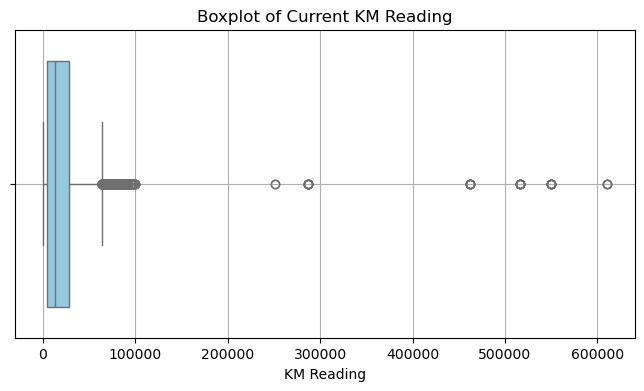

In [137]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['current_km_reading'], color='skyblue')
plt.title('Boxplot of Current KM Reading')
plt.xlabel('KM Reading')
plt.grid(True)
plt.show()

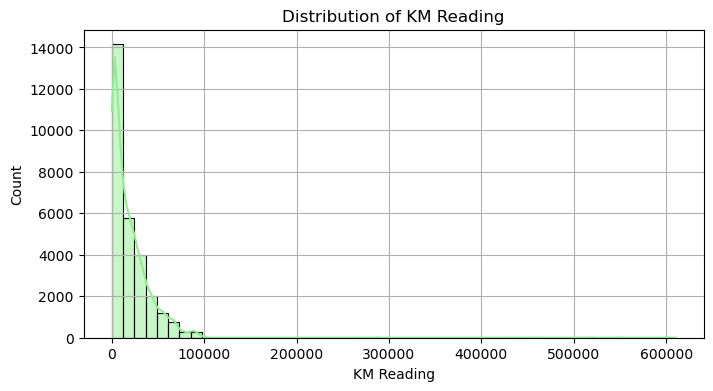

In [138]:
plt.figure(figsize=(8, 4))
sns.histplot(data['current_km_reading'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of KM Reading')
plt.xlabel('KM Reading')
plt.grid(True)
plt.show()

In [139]:
data = data[data['current_km_reading'] <= 100000]


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28446 entries, 0 to 28481
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_card_date       28446 non-null  object
 1   vehicle_model       28446 non-null  object
 2   current_km_reading  28446 non-null  int64 
 3   invoice_line_text   28413 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [141]:
data.head()

,job_card_date,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,758,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [142]:
data.isnull().sum()

job_card_date          0
vehicle_model          0
current_km_reading     0
invoice_line_text     33
dtype: int64

In [143]:
data = data.dropna()


In [144]:
data

,job_card_date,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,31-05-17,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,31-05-17,BAJAJ PULSAR NS 200,758,POLISH
3,31-05-17,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,31-05-17,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...
28477,06-01-19,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,BAJAJ DISCOVER 125,12805,DISC OIL


In [145]:
data['job_card_date'] = pd.to_datetime(data['job_card_date'], dayfirst=True)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25140\3111648352.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['job_card_date'] = pd.to_datetime(data['job_card_date'], dayfirst=True)


In [146]:
data

,job_card_date,vehicle_model,current_km_reading,invoice_line_text
0,2017-05-30,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,2017-05-31,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,2017-05-31,BAJAJ PULSAR NS 200,758,POLISH
3,2017-05-31,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,2017-05-31,BAJAJ PULSAR NS 200,758,COOLANT OIL
...,...,...,...,...
28477,2019-01-06,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,2019-01-06,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,2019-01-06,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,2019-01-06,BAJAJ DISCOVER 125,12805,DISC OIL


In [149]:
data['month'] = data['job_card_date'].dt.to_period('M').dt.to_timestamp()


In [150]:
data

,job_card_date,vehicle_model,current_km_reading,invoice_line_text,month
0,2017-05-30,BAJAJ AVENGER STREET 220,50000,engine oil,2017-05-01
1,2017-05-31,BAJAJ PULSAR NS 200,758,engine oil,2017-05-01
2,2017-05-31,BAJAJ PULSAR NS 200,758,polish,2017-05-01
3,2017-05-31,BAJAJ PULSAR NS 200,758,consumables,2017-05-01
4,2017-05-31,BAJAJ PULSAR NS 200,758,coolant oil,2017-05-01
...,...,...,...,...,...
28477,2019-01-06,BAJAJ DISCOVER 125,12805,sprocket rubber,2019-01-01
28478,2019-01-06,BAJAJ DISCOVER 125,12805,clutch cable,2019-01-01
28479,2019-01-06,BAJAJ DISCOVER 125,12805,oil filter,2019-01-01
28480,2019-01-06,BAJAJ DISCOVER 125,12805,disc oil,2019-01-01


In [151]:
data['invoice_line_text'] = data['invoice_line_text'].str.strip().str.lower()
data['vehicle_model'] = data['vehicle_model'].str.strip().str.upper()


In [152]:
data

,job_card_date,vehicle_model,current_km_reading,invoice_line_text,month
0,2017-05-30,BAJAJ AVENGER STREET 220,50000,engine oil,2017-05-01
1,2017-05-31,BAJAJ PULSAR NS 200,758,engine oil,2017-05-01
2,2017-05-31,BAJAJ PULSAR NS 200,758,polish,2017-05-01
3,2017-05-31,BAJAJ PULSAR NS 200,758,consumables,2017-05-01
4,2017-05-31,BAJAJ PULSAR NS 200,758,coolant oil,2017-05-01
...,...,...,...,...,...
28477,2019-01-06,BAJAJ DISCOVER 125,12805,sprocket rubber,2019-01-01
28478,2019-01-06,BAJAJ DISCOVER 125,12805,clutch cable,2019-01-01
28479,2019-01-06,BAJAJ DISCOVER 125,12805,oil filter,2019-01-01
28480,2019-01-06,BAJAJ DISCOVER 125,12805,disc oil,2019-01-01


In [153]:
data['invoice_line_text'].value_counts()


invoice_line_text
engine oil           3799
chain lubrication    3437
general service      2136
air filter           1713
3m oil               1628
                     ... 
rim tubless neck        1
radiator overhual       1
clutch cam switch       1
gear box oil            1
helmet                  1
Name: count, Length: 493, dtype: int64

In [154]:
data['invoice_line_text'].unique()


array(['engine oil', 'polish', 'consumables', 'coolant oil',
       'chain lubrication', '4 way switch', '3m oil', 'general service',
       'oil filter', 'indicator', 'head rest', 'valve guide',
       'timming chain', 'foot rest', 'low beam bulb', 'valve grainding',
       'disc pad', 'loading gear', 'packing kit', 'timming chain pad',
       'tensioner', 'clutch bell rest', 'clutch assembly', 'valve kit',
       'spark plug', 'one way clutch', 'bore kit', 'air filter',
       'head rubber', 'clutch cable', 'crank shaft', 'brake adjustment',
       'brake shoe', 'air filter checkup', 'drum bolt washer',
       'tank cleaning', 'fork bend', 'gear shaft', 'clutch cover gasket',
       'indicator bulb', 'gear lever', 'handlebar', 'crash guard',
       'fork oil seal', 'fork oil', 'side shield', 'visior',
       'fork cone set', 'head light doom', 'tank assembly', 'disc lever',
       'carburetor cleaning', 'seat cover', 'buzzer', 'tail lamp bulb',
       'disc oil', 'disc overhual', 'ma

In [155]:
service_keywords = [
    'service', 'general service', 'engine labour', 'fork labour', 'labour', 
    'washing', 'washing and labour', 'carburetor cleaning', 'polish', 
    'teflon coating', 'battery charge', 'wiring checkup', 'clutch overhual', 
    'engine overhual', 'chain overhaul', 'fork overhual', 'disc overhual', 
    'magnet overhual', 'radiator overhual', 'engine re condition', 
    'coolant oil top up', 'engine oil topup', 'disc oil topup', 'test ride', 
    'cleaning', 'tank cleaning', 'payment', 'pickup charges', 
    'seat fitting charge', 'light fitting charge', 'fitting labour', 
    'visior with labour', 'wiring check with labor'
]
data = data[~data['invoice_line_text'].isin(service_keywords)]


In [156]:
data

,job_card_date,vehicle_model,current_km_reading,invoice_line_text,month
0,2017-05-30,BAJAJ AVENGER STREET 220,50000,engine oil,2017-05-01
1,2017-05-31,BAJAJ PULSAR NS 200,758,engine oil,2017-05-01
3,2017-05-31,BAJAJ PULSAR NS 200,758,consumables,2017-05-01
4,2017-05-31,BAJAJ PULSAR NS 200,758,coolant oil,2017-05-01
5,2017-05-31,BAJAJ PULSAR NS 200,758,chain lubrication,2017-05-01
...,...,...,...,...,...
28477,2019-01-06,BAJAJ DISCOVER 125,12805,sprocket rubber,2019-01-01
28478,2019-01-06,BAJAJ DISCOVER 125,12805,clutch cable,2019-01-01
28479,2019-01-06,BAJAJ DISCOVER 125,12805,oil filter,2019-01-01
28480,2019-01-06,BAJAJ DISCOVER 125,12805,disc oil,2019-01-01


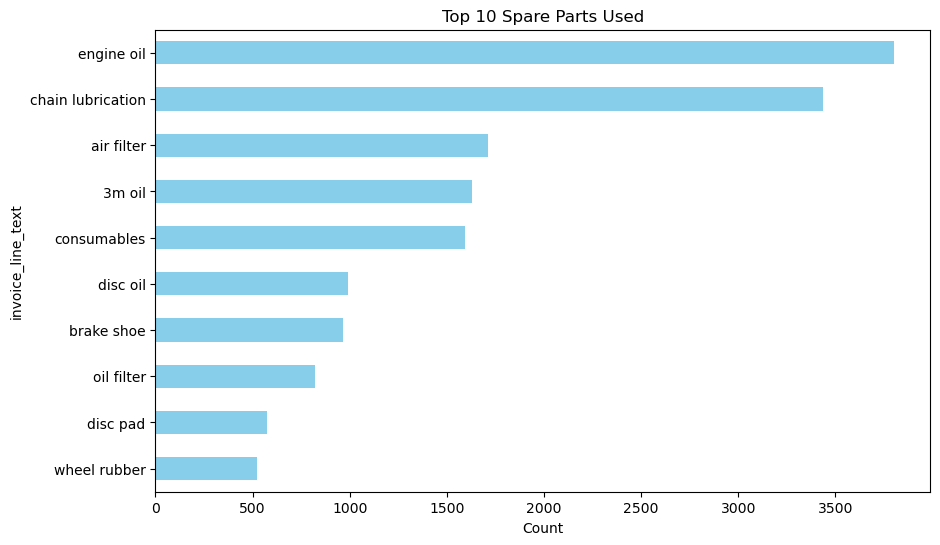

In [157]:
top_parts = data['invoice_line_text'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_parts.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Spare Parts Used')
plt.xlabel('Count')
plt.show()

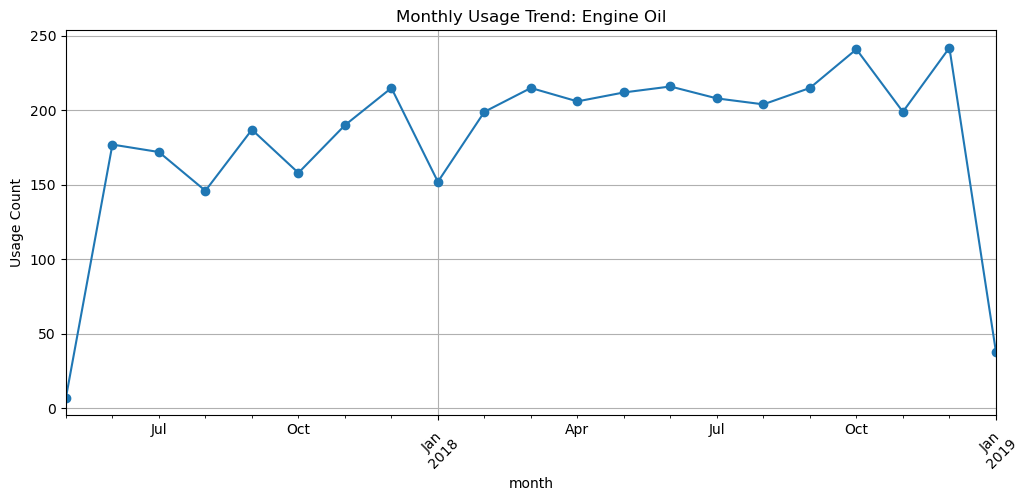

In [158]:
part_name = 'engine oil' 

trend = data[data['invoice_line_text'] == part_name].groupby('month').size()

plt.figure(figsize=(12,5))
trend.plot(kind='line', marker='o')
plt.title(f'Monthly Usage Trend: {part_name.title()}')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [159]:
bike_monthly = data.groupby(['month', 'vehicle_model']).size().reset_index(name='count')
bike_monthly.head()


,month,vehicle_model,count
0,2017-05-01,BAJAJ AVENGER STREET 220,1
1,2017-05-01,BAJAJ PLATINA,3
2,2017-05-01,BAJAJ PULSAR 150,3
3,2017-05-01,BAJAJ PULSAR 220,24
4,2017-05-01,BAJAJ PULSAR NS 200,5


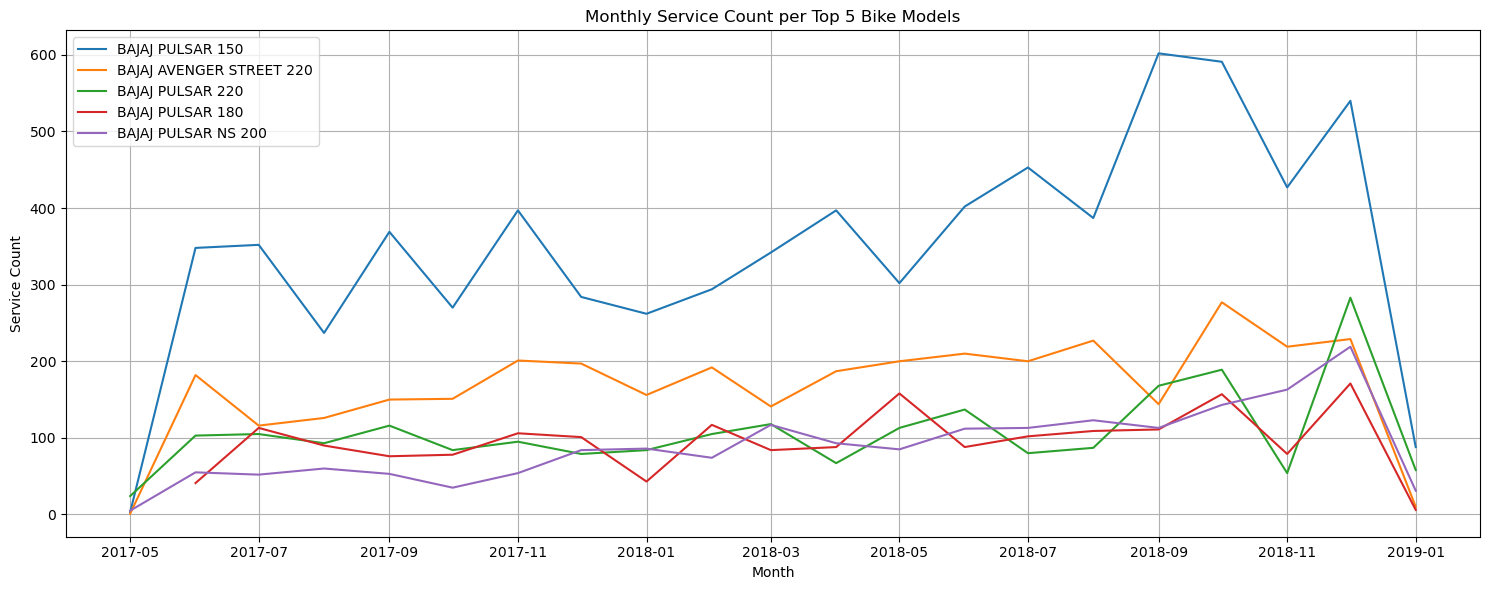

In [169]:
top_models = data['vehicle_model'].value_counts().head(5).index.tolist()
top_bikes = bike_monthly[bike_monthly['vehicle_model'].isin(top_models)]
pivoted = top_bikes.pivot(index='month', columns='vehicle_model', values='count')

plt.figure(figsize=(15,6))
for model in top_models:
    plt.plot(pivoted.index, pivoted[model], label=model)

plt.title("Monthly Service Count per Top 5 Bike Models")
plt.xlabel("Month")
plt.ylabel("Service Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [170]:
grouped_data = data.groupby(['vehicle_model'])['invoice_line_text'].count().reset_index()
grouped_data.rename(columns={'invoice_line_text': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data


,vehicle_model,count
12,BAJAJ PULSAR 150,7347
2,BAJAJ AVENGER STREET 220,3516
14,BAJAJ PULSAR 220,2242
13,BAJAJ PULSAR 180,1918
18,BAJAJ PULSAR NS 200,1870
5,BAJAJ CT 100,1227
7,BAJAJ DISCOVER 125,1161
0,BAJAJ AVENGER STREET,916
11,BAJAJ PLATINA,724
23,BAJAJ V150,578


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25140\3535360672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='vehicle_model', data=grouped_data.head(15), palette='viridis')


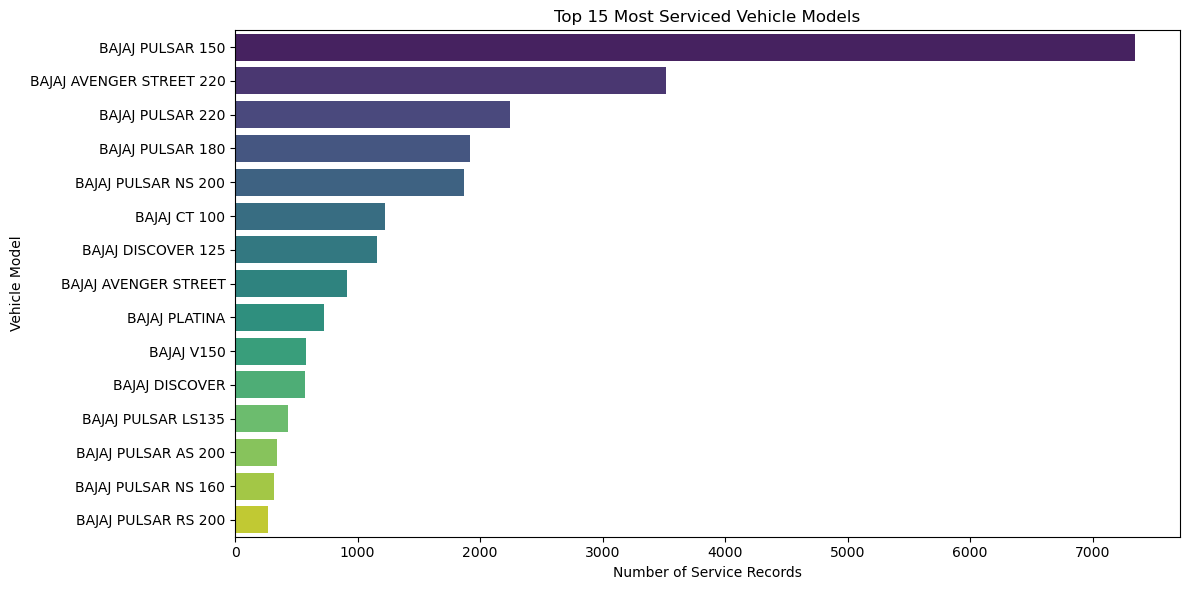

In [171]:
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='vehicle_model', data=grouped_data.head(15), palette='viridis')

plt.xlabel('Number of Service Records')
plt.ylabel('Vehicle Model')
plt.title('Top 15 Most Serviced Vehicle Models')
plt.tight_layout()
plt.show()

In [172]:
grouped_data = data.groupby(['invoice_line_text'])['vehicle_model'].count().reset_index()
grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,invoice_line_text,count
136,engine oil,3799
72,chain lubrication,3437
10,air filter,1713
2,3m oil,1628
102,consumables,1595
...,...,...
242,insurance,1
243,intake,1
245,kicker,1
246,kicker rubber,1


In [173]:
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('BULB ', 'BULB', regex=False)
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('OVERHUAL', 'OVERHAUL', regex=False)
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('WIELDING', 'WELDING', regex=False)
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('ENGINE OIL TOPUP', 'ENGINE OIL', regex=False)
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('ASSEBLY', 'ASSEMBLY', regex=False)
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('GRIP HANDLE', 'HANDLE GRIPPER', regex=False)
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('HANDLEBAR', 'HANDLE BAR', regex=False)
data.loc[:, 'invoice_line_text'] = data['invoice_line_text'].str.replace('NUMBER PLATE WITH STICKERS', 'NUMBER PLATE', regex=False)


In [174]:
data

,job_card_date,vehicle_model,current_km_reading,invoice_line_text,month
0,2017-05-30,BAJAJ AVENGER STREET 220,50000,engine oil,2017-05-01
1,2017-05-31,BAJAJ PULSAR NS 200,758,engine oil,2017-05-01
3,2017-05-31,BAJAJ PULSAR NS 200,758,consumables,2017-05-01
4,2017-05-31,BAJAJ PULSAR NS 200,758,coolant oil,2017-05-01
5,2017-05-31,BAJAJ PULSAR NS 200,758,chain lubrication,2017-05-01
...,...,...,...,...,...
28477,2019-01-06,BAJAJ DISCOVER 125,12805,sprocket rubber,2019-01-01
28478,2019-01-06,BAJAJ DISCOVER 125,12805,clutch cable,2019-01-01
28479,2019-01-06,BAJAJ DISCOVER 125,12805,oil filter,2019-01-01
28480,2019-01-06,BAJAJ DISCOVER 125,12805,disc oil,2019-01-01


# Trend

In [175]:
monthly_parts = data.groupby('month').size().reset_index(name='count')
monthly_parts['month'] = pd.to_datetime(monthly_parts['month'])
monthly_parts = monthly_parts.sort_values('month')


In [176]:
monthly_parts

,month,count
0,2017-05-01,39
1,2017-06-01,1119
2,2017-07-01,989
3,2017-08-01,826
4,2017-09-01,1090
5,2017-10-01,888
6,2017-11-01,1144
7,2017-12-01,1156
8,2018-01-01,812
9,2018-02-01,1123


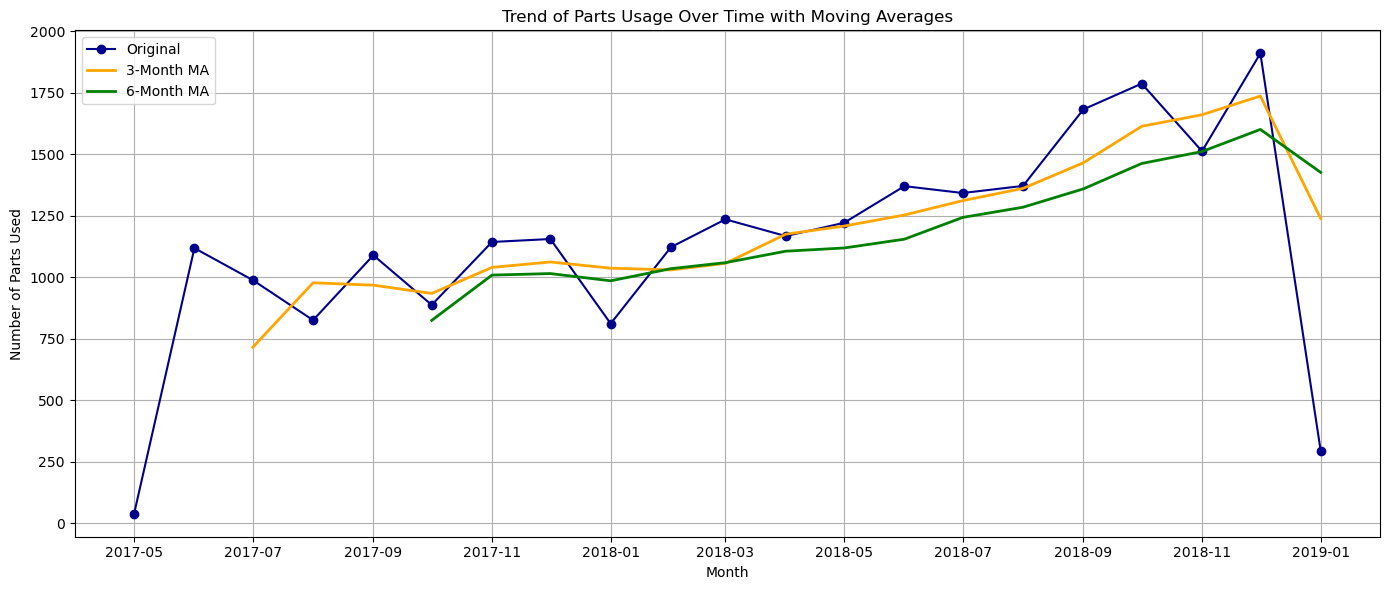

In [177]:
monthly_parts['ma_3'] = monthly_parts['count'].rolling(window=3).mean()
monthly_parts['ma_6'] = monthly_parts['count'].rolling(window=6).mean()
plt.figure(figsize=(14, 6))
plt.plot(monthly_parts['month'], monthly_parts['count'], marker='o', color='darkblue', label='Original')
plt.plot(monthly_parts['month'], monthly_parts['ma_3'], color='orange', linewidth=2, label='3-Month MA')
plt.plot(monthly_parts['month'], monthly_parts['ma_6'], color='green', linewidth=2, label='6-Month MA')
plt.title('Trend of Parts Usage Over Time with Moving Averages')
plt.xlabel('Month')
plt.ylabel('Number of Parts Used')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Linear Regression

In [178]:
from sklearn.linear_model import LinearRegression
monthly_parts = monthly_parts.sort_values('month')
monthly_parts['month_num'] = np.arange(len(monthly_parts))


X = monthly_parts['month_num'].values.reshape(-1, 1)
y = monthly_parts['count'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)




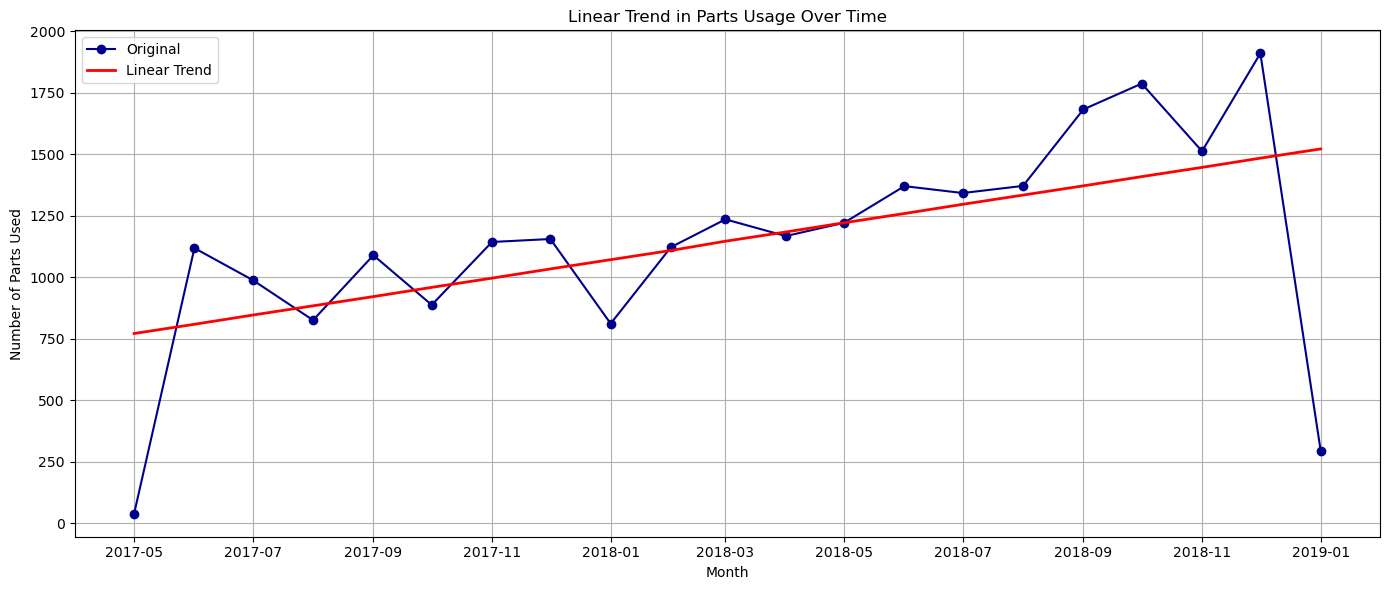

In [179]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_parts['month'], monthly_parts['count'], marker='o', label='Original', color='darkblue')
plt.plot(monthly_parts['month'], trend, color='red', linewidth=2, label='Linear Trend')
plt.title('Linear Trend in Parts Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Parts Used')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Seasonality

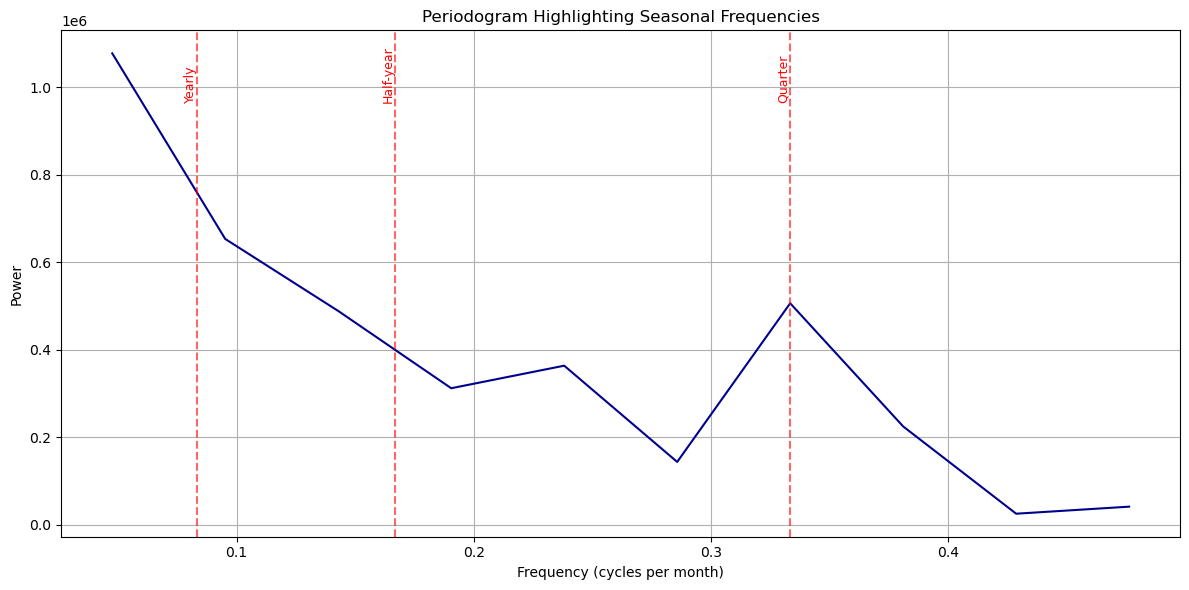

In [180]:
from scipy.signal import periodogram

y = monthly_parts['count'].values

frequencies, power = periodogram(y)

seasonal_freqs = {
    'Yearly': 1/12,
    'Half-year': 1/6,
    'Quarter': 1/3,
    'Month': 1,
    'Bi-week': 2,
    'Week': 4
}


plt.figure(figsize=(12, 6))
plt.plot(frequencies[1:], power[1:], label='Periodogram', color='darkblue')


for label, freq in seasonal_freqs.items():
    if freq < max(frequencies):
        plt.axvline(x=freq, color='red', linestyle='--', alpha=0.6)
        plt.text(freq, max(power)*0.9, label, rotation=90, color='red', fontsize=9, ha='right')

plt.title('Periodogram Highlighting Seasonal Frequencies')
plt.xlabel('Frequency (cycles per month)')
plt.ylabel('Power')
plt.grid(True)
plt.tight_layout()
plt.show()


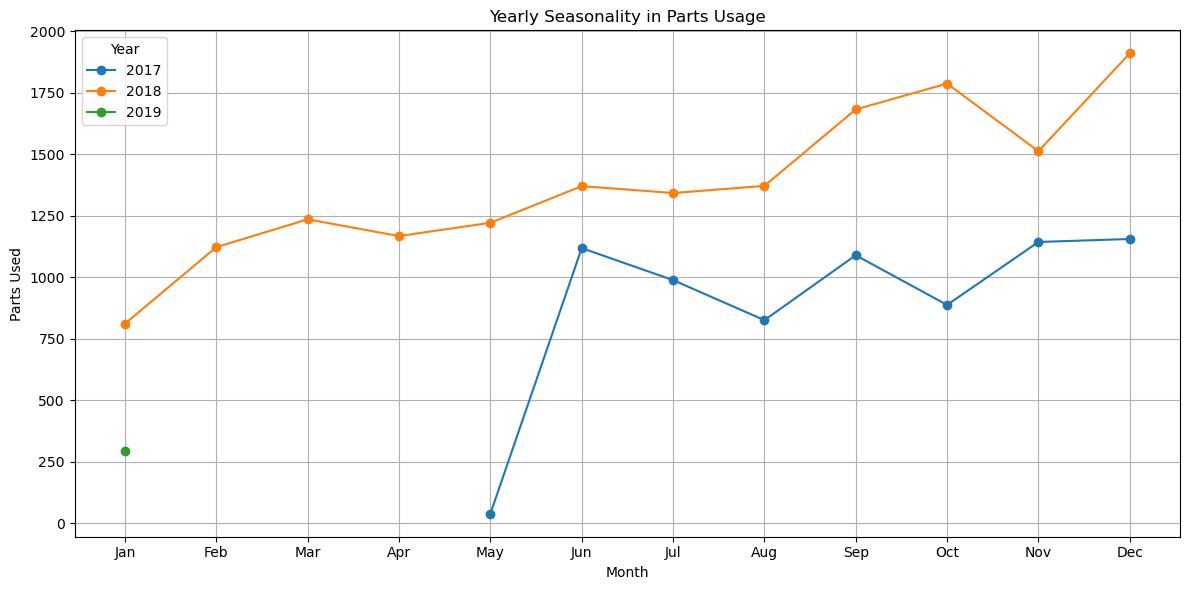

In [181]:
import matplotlib.pyplot as plt

monthly_parts['year'] = monthly_parts['month'].dt.year
monthly_parts['month_num'] = monthly_parts['month'].dt.month

pivot = monthly_parts.pivot_table(index='month_num', columns='year', values='count')

plt.figure(figsize=(12, 6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=str(year))

plt.title('Yearly Seasonality in Parts Usage')
plt.xlabel('Month')
plt.ylabel('Parts Used')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


In [182]:
monthly_parts

,month,count,ma_3,ma_6,month_num,year
0,2017-05-01,39,NaN,NaN,5,2017
1,2017-06-01,1119,NaN,NaN,6,2017
2,2017-07-01,989,715.666667,NaN,7,2017
3,2017-08-01,826,978.000000,NaN,8,2017
4,2017-09-01,1090,968.333333,NaN,9,2017
5,2017-10-01,888,934.666667,825.166667,10,2017
6,2017-11-01,1144,1040.666667,1009.333333,11,2017
7,2017-12-01,1156,1062.666667,1015.500000,12,2017
8,2018-01-01,812,1037.333333,986.000000,1,2018
9,2018-02-01,1123,1030.333333,1035.500000,2,2018


# Time Series Prediction

# AR

In [183]:
from statsmodels.tsa.stattools import adfuller
time_series = monthly_parts['count']
result = adfuller(time_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.173597813428466
p-value: 0.21596707192384174


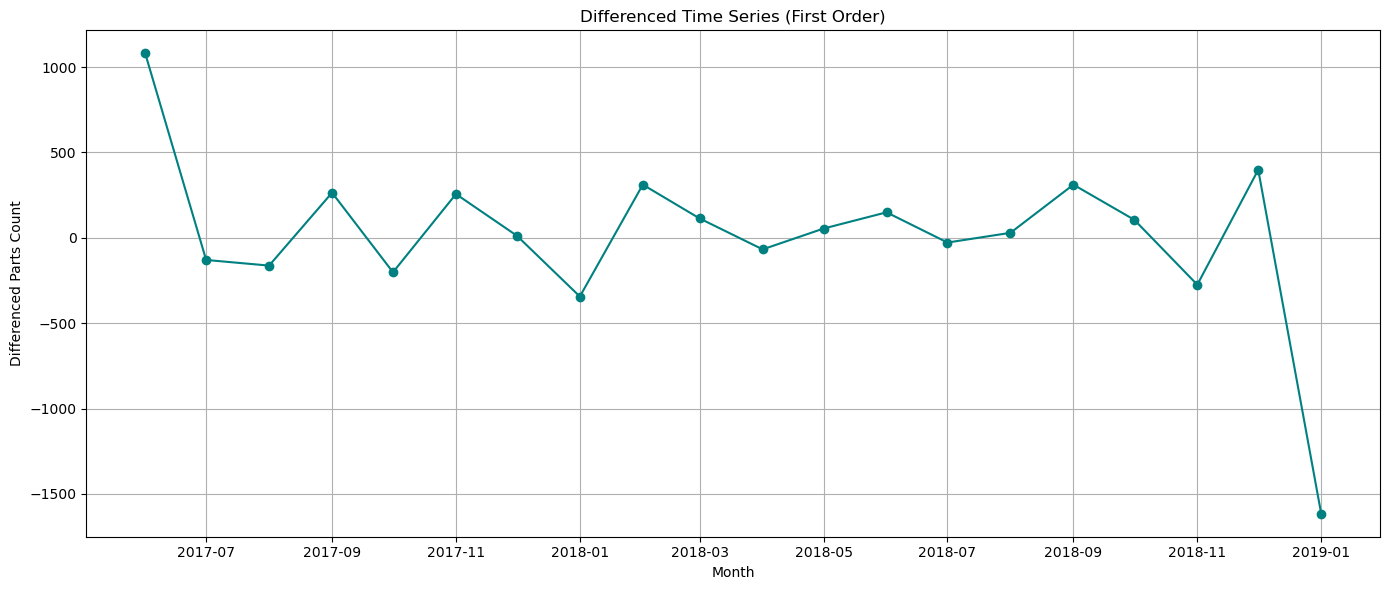

In [184]:
# As Data is Non-Stationary
diff_series = monthly_parts['count'].diff().dropna()
plt.figure(figsize=(14, 6))
plt.plot(monthly_parts['month'][1:], diff_series, marker='o', color='teal')
plt.title('Differenced Time Series (First Order)')
plt.xlabel('Month')
plt.ylabel('Differenced Parts Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [185]:
adf_result = adfuller(diff_series)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -5.125790345787525
p-value: 1.2438108106186146e-05


In [186]:
split_index = int(len(diff_series) * 0.60)
train, test = diff_series[:split_index], diff_series[split_index:]


In [200]:
from statsmodels.tsa.ar_model import AutoReg

model_ar = AutoReg(train, lags=3)
model_fit_ar = model_ar.fit()


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [201]:
preds = model_fit_ar.predict(start=len(train), end=len(train)+len(test)-1)


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, preds)
mse = mean_squared_error(test, preds)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


MAE: 349.19
MSE: 375106.35


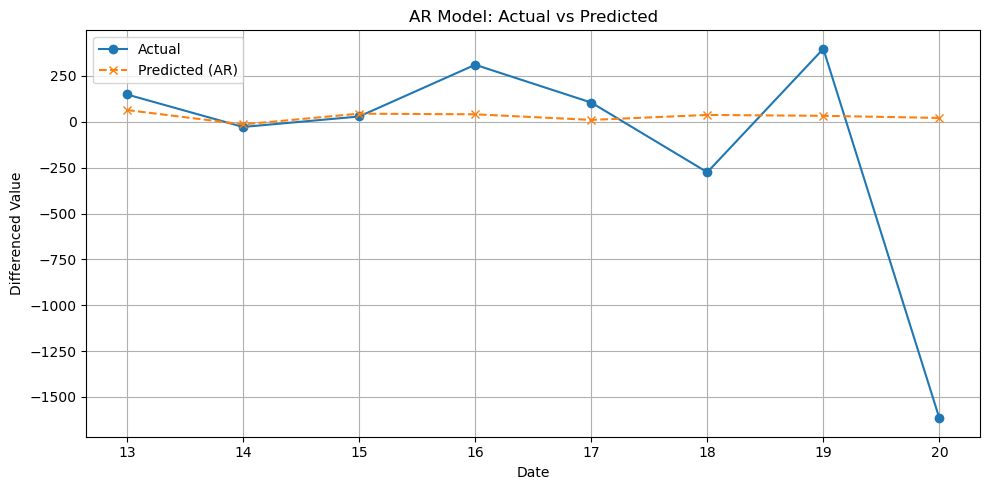

In [203]:
plt.figure(figsize=(10, 5))
plt.plot(test.index, test.values, label='Actual', marker='o')
plt.plot(test.index, preds, label='Predicted (AR)', linestyle='--', marker='x')
plt.title('AR Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Moving Average

In [204]:
df = monthly_parts.copy()

valid_ma3 = df.dropna(subset=["ma_3"])
valid_ma6 = df.dropna(subset=["ma_6"])


mae_3 = mean_absolute_error(valid_ma3["count"], valid_ma3["ma_3"])
rmse_3 = np.sqrt(mean_squared_error(valid_ma3["count"], valid_ma3["ma_3"]))
mape_3 = np.mean(np.abs((valid_ma3["count"] - valid_ma3["ma_3"]) / valid_ma3["count"])) * 100

mae_6 = mean_absolute_error(valid_ma6["count"], valid_ma6["ma_6"])
rmse_6 = np.sqrt(mean_squared_error(valid_ma6["count"], valid_ma6["ma_6"]))
mape_6 = np.mean(np.abs((valid_ma6["count"] - valid_ma6["ma_6"]) / valid_ma6["count"])) * 100

print("=== 3-Month Moving Average Metrics ===")
print(f"MAE  : {mae_3:.2f}")
print(f"RMSE : {rmse_3:.2f}")
print(f"MAPE : {mape_3:.2f}%\n")

print("=== 6-Month Moving Average Metrics ===")
print(f"MAE  : {mae_6:.2f}")
print(f"RMSE : {rmse_6:.2f}")
print(f"MAPE : {mape_6:.2f}%")

=== 3-Month Moving Average Metrics ===
MAE  : 164.42
RMSE : 257.77
MAPE : 26.58%

=== 6-Month Moving Average Metrics ===
MAE  : 214.49
RMSE : 333.17
MAPE : 34.68%


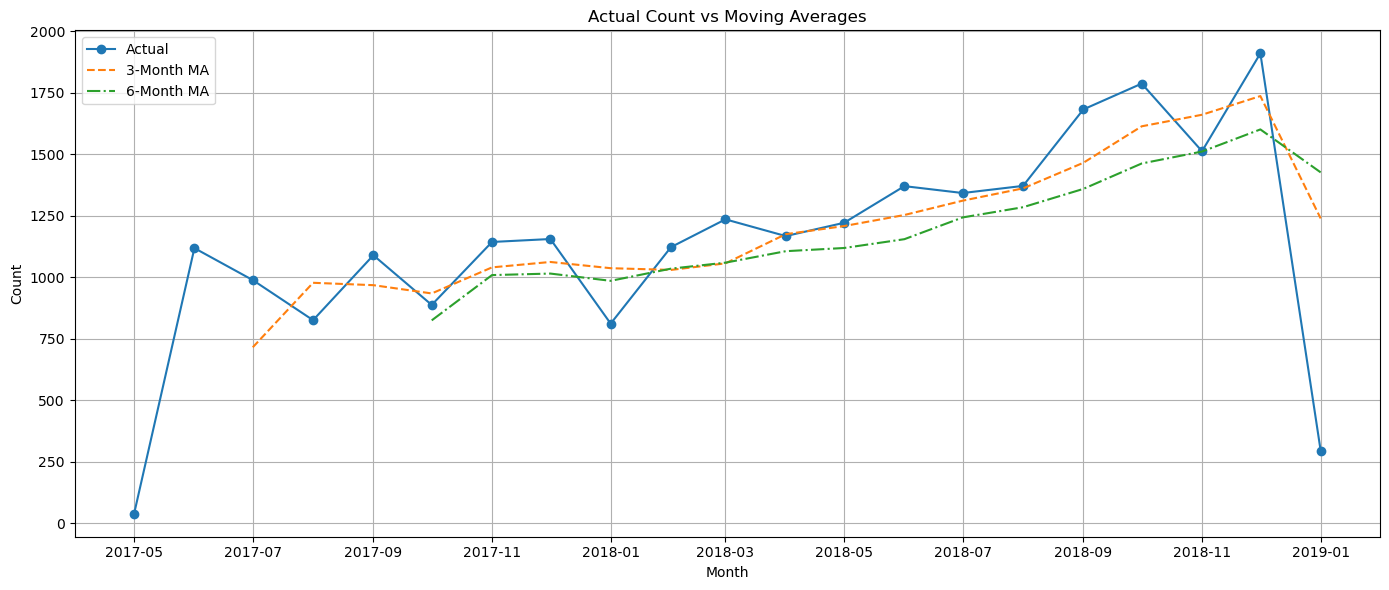

In [115]:
import matplotlib.pyplot as plt


monthly_parts['month'] = pd.to_datetime(monthly_parts['month'])


plt.figure(figsize=(14, 6))
plt.plot(monthly_parts['month'], monthly_parts['count'], label='Actual', marker='o')
plt.plot(monthly_parts['month'], monthly_parts['ma_3'], label='3-Month MA', linestyle='--')
plt.plot(monthly_parts['month'], monthly_parts['ma_6'], label='6-Month MA', linestyle='-.')
plt.title('Actual Count vs Moving Averages')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# EWMA

In [205]:

monthly_parts["ewma_3"] = monthly_parts["count"].ewm(span=3, adjust=False).mean()
monthly_parts["ewma_6"] = monthly_parts["count"].ewm(span=6, adjust=False).mean()


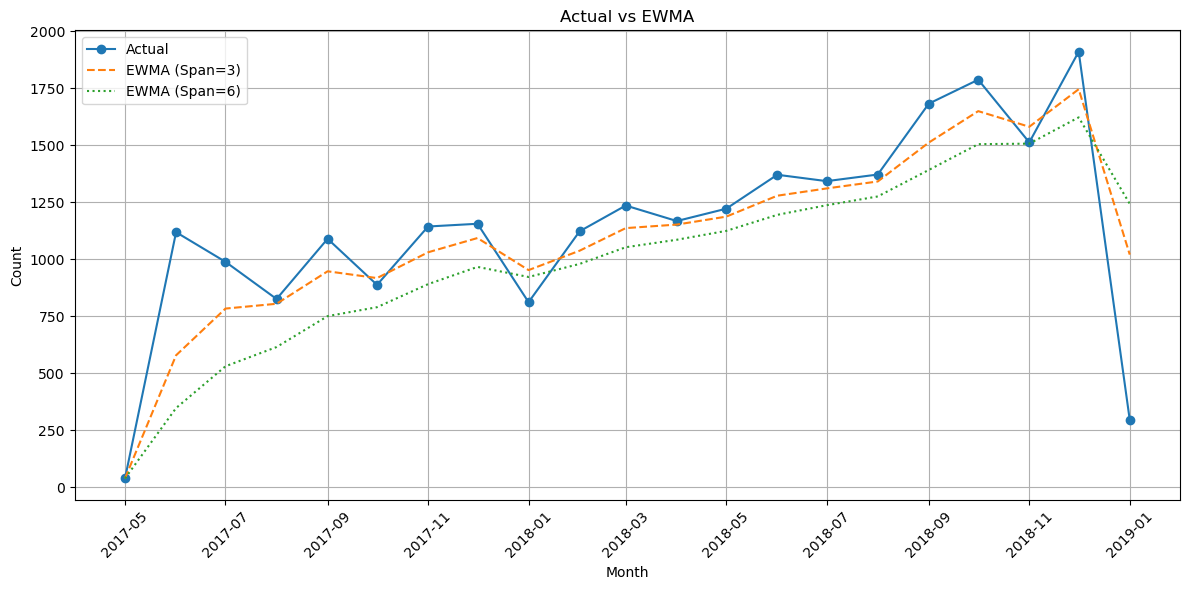

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_parts["month"], monthly_parts["count"], label="Actual", marker='o')
plt.plot(monthly_parts["month"], monthly_parts["ewma_3"], label="EWMA (Span=3)", linestyle="--")
plt.plot(monthly_parts["month"], monthly_parts["ewma_6"], label="EWMA (Span=6)", linestyle=":")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Actual vs EWMA")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [207]:
valid_ewma_3 = monthly_parts.dropna(subset=["ewma_3"])
valid_ewma_6 = monthly_parts.dropna(subset=["ewma_6"])

mae_ewma3 = mean_absolute_error(valid_ewma_3["count"], valid_ewma_3["ewma_3"])
mse_ewma3 = mean_squared_error(valid_ewma_3["count"], valid_ewma_3["ewma_3"])

mae_ewma6 = mean_absolute_error(valid_ewma_6["count"], valid_ewma_6["ewma_6"])
mse_ewma6 = mean_squared_error(valid_ewma_6["count"], valid_ewma_6["ewma_6"])

print("=== EWMA (Span=3) ===")
print(f"MAE : {mae_ewma3:.2f}")
print(f"MSE : {mse_ewma3:.2f}\n")

print("=== EWMA (Span=6) ===")
print(f"MAE : {mae_ewma6:.2f}")
print(f"MSE : {mse_ewma6:.2f}")

=== EWMA (Span=3) ===
MAE : 138.62
MSE : 48915.36

=== EWMA (Span=6) ===
MAE : 244.24
MSE : 112125.84


# Holt-Winter

In [208]:
monthly_parts.set_index('month', inplace=True)

ts = monthly_parts['count']

In [209]:
monthly_parts

,count,ma_3,ma_6,month_num,year,ewma_3,ewma_6
month,,,,,,,
2017-05-01,39,NaN,NaN,5,2017,39.000000,39.000000
2017-06-01,1119,NaN,NaN,6,2017,579.000000,347.571429
2017-07-01,989,715.666667,NaN,7,2017,784.000000,530.836735
2017-08-01,826,978.000000,NaN,8,2017,805.000000,615.169096
2017-09-01,1090,968.333333,NaN,9,2017,947.500000,750.835069
2017-10-01,888,934.666667,825.166667,10,2017,917.750000,790.025049
2017-11-01,1144,1040.666667,1009.333333,11,2017,1030.875000,891.160749
2017-12-01,1156,1062.666667,1015.500000,12,2017,1093.437500,966.829107
2018-01-01,812,1037.333333,986.000000,1,2018,952.718750,922.592219


In [210]:
train = ts[:-6]
test = ts[-6:]


In [211]:
model = ExponentialSmoothing(train, trend='add')
hw_fit = model.fit()
pred_hw = hw_fit.forecast(len(test))


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


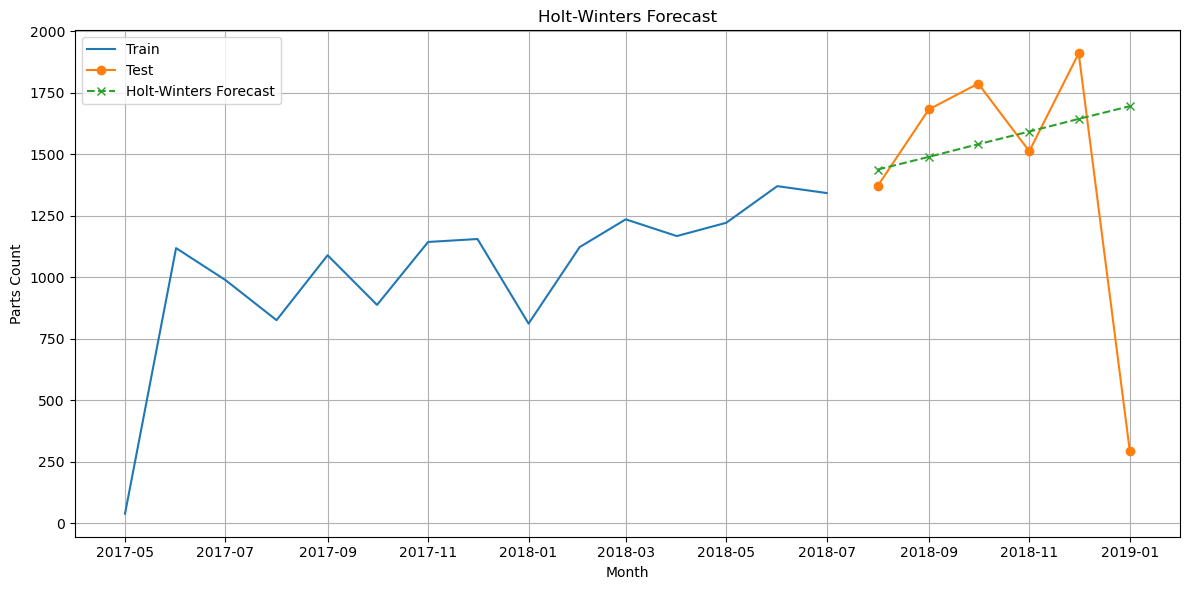

In [212]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", marker='o')
plt.plot(test.index, pred_hw, label="Holt-Winters Forecast", linestyle='--', marker='x')
plt.xlabel("Month")
plt.ylabel("Parts Count")
plt.title("Holt-Winters Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [213]:
mae_hw = mean_absolute_error(test, pred_hw)
mse_hw = mean_squared_error(test, pred_hw)

print(f"MAE: {mae_hw:.2f}")
print(f"MSE: {mse_hw:.2f}")

MAE: 375.58
MSE: 357095.11


# SARIMA

In [214]:
monthly_parts = monthly_parts.sort_index()
train = y[:-6]
test = y[-6:]

In [226]:
model = SARIMAX(train, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()
n_periods = len(test)
pred = results.get_forecast(steps=n_periods)
pred_mean = pred.predicted_mean

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [227]:
mae = mean_absolute_error(test, pred_mean)
mse = mean_squared_error(test, pred_mean)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

MAE: 377.33
MSE: 218628.00


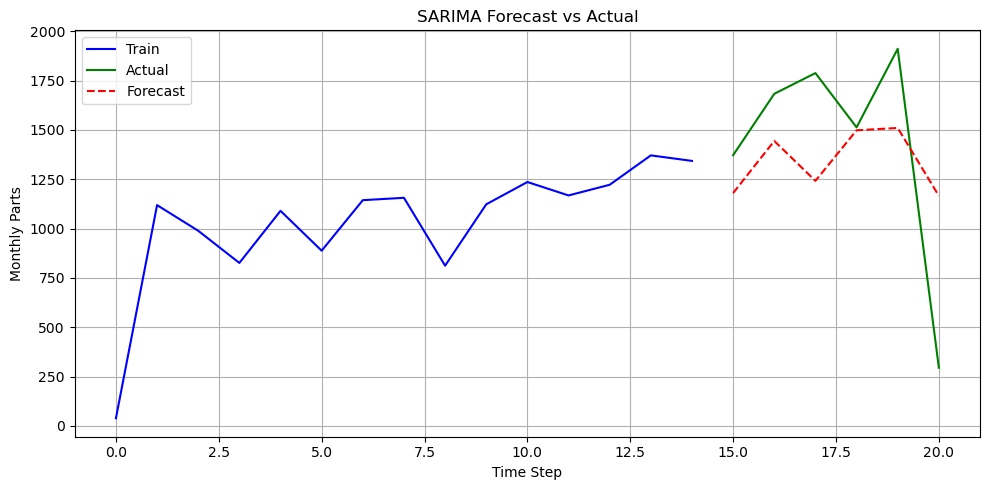

In [228]:

train = pd.Series(train, index=pd.date_range(start='2018-01-01', periods=len(train), freq='MS'))
test = pd.Series(test, index=pd.date_range(start='2022-01-01', periods=len(test), freq='MS'))

plt.figure(figsize=(10, 5))

plt.plot(range(len(train)), train, label='Train', color='blue')
plt.plot(range(len(train), len(train) + len(test)), test, label='Actual', color='green')
plt.plot(range(len(train), len(train) + len(test)), pred_mean, label='Forecast', color='red', linestyle='--')

plt.title("SARIMA Forecast vs Actual")
plt.xlabel("Time Step")
plt.ylabel("Monthly Parts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# SARIMAX

In [229]:
train =ts[:-6]
test = ts[-6:]


In [230]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)


C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters

In [231]:
forecast = model_fit.get_forecast(steps=6)
pred_mean = forecast.predicted_mean


In [232]:
mae = mean_absolute_error(test, pred_mean)
mse = mean_squared_error(test, pred_mean)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


MAE: 397.32
MSE: 240559.56


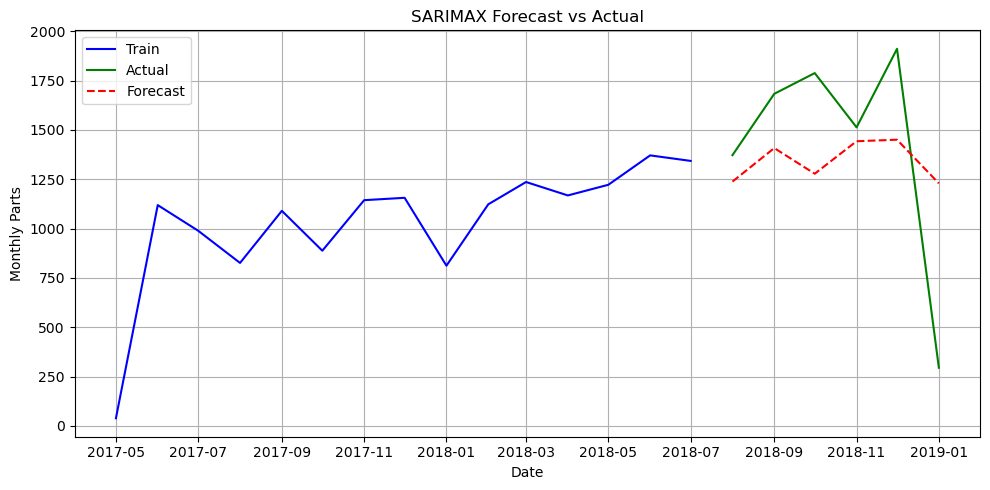

In [233]:
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Actual", color="green")
plt.plot(test.index, pred_mean, label="Forecast", color="red", linestyle="--")
plt.title("SARIMAX Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Monthly Parts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# LSTM

In [234]:
grouped_data

,invoice_line_text,count
136,engine oil,3799
72,chain lubrication,3437
10,air filter,1713
2,3m oil,1628
102,consumables,1595
...,...,...
242,insurance,1
243,intake,1
245,kicker,1
246,kicker rubber,1


In [236]:
grouped = data.groupby("job_card_date").size()


grouped.index = pd.to_datetime(grouped.index)


grouped = grouped.sort_index()

print(grouped)


job_card_date
2017-05-30     1
2017-05-31    38
2017-06-01    44
2017-06-02    16
2017-06-03    34
              ..
2019-01-02    72
2019-01-03    49
2019-01-04    78
2019-01-05    73
2019-01-06    23
Length: 553, dtype: int64


In [238]:
df = grouped.to_frame(name='count')
df

,count
job_card_date,
2017-05-30,1
2017-05-31,38
2017-06-01,44
2017-06-02,16
2017-06-03,34
...,...
2019-01-02,72
2019-01-03,49
2019-01-04,78


In [239]:
df['ma_7'] = df['count'].rolling(window=7).mean()
df['ewma_7'] = df['count'].ewm(span=7).mean()




In [241]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(grouped.values.reshape(-1, 1))
data_scaled

array([[0.        ],
       [0.23717949],
       [0.27564103],
       [0.09615385],
       [0.21153846],
       [0.07692308],
       [0.45512821],
       [0.32692308],
       [0.1474359 ],
       [0.06410256],
       [0.11538462],
       [0.6474359 ],
       [0.04487179],
       [0.24358974],
       [0.23076923],
       [0.67307692],
       [0.12820513],
       [0.32051282],
       [0.11538462],
       [0.16025641],
       [0.14102564],
       [0.12179487],
       [0.13461538],
       [0.46153846],
       [0.25      ],
       [0.33333333],
       [0.20512821],
       [0.32051282],
       [0.13461538],
       [0.23076923],
       [0.15384615],
       [0.16025641],
       [0.48717949],
       [0.12179487],
       [0.25641026],
       [0.03846154],
       [0.19871795],
       [0.28205128],
       [0.49358974],
       [0.        ],
       [0.30128205],
       [0.22435897],
       [0.15384615],
       [0.23076923],
       [0.19230769],
       [0.30128205],
       [0.19230769],
       [0.352

In [242]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(data_scaled, seq_length)


In [243]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=16)


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0767
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0225
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0192
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0209
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0226
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0175
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0200
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0203
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0186
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0215
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0193
Epoch 13/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0197
Epoch 14/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0200
Epoch 15/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0195
Epoch 16

In [244]:
forecast = []
input_seq = data_scaled[-seq_length:]

for _ in range(365):
    pred = model.predict(input_seq.reshape(1, seq_length, 1), verbose=0)
    forecast.append(pred[0])
    input_seq = np.append(input_seq[1:], pred, axis=0)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))


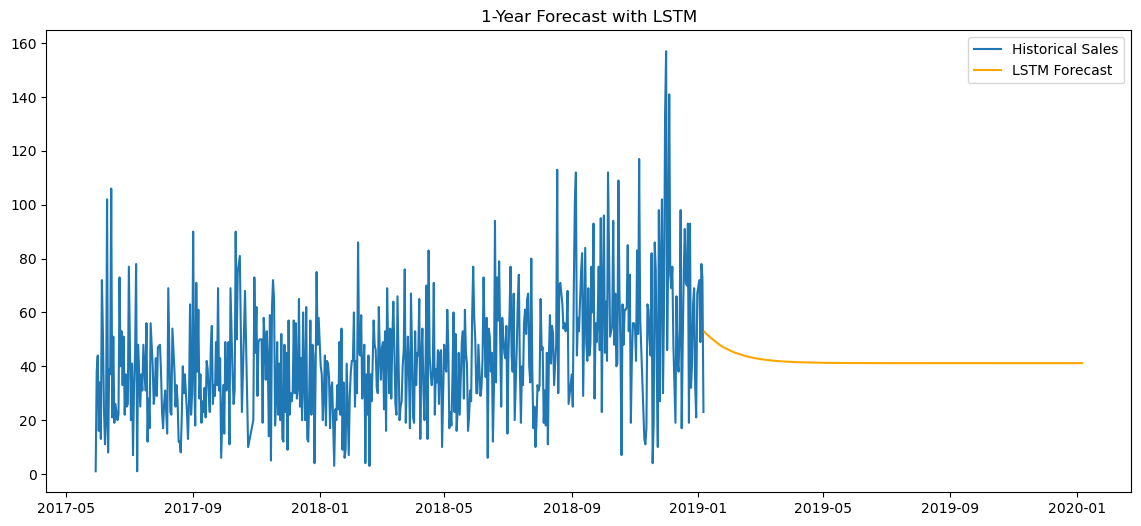

In [245]:
future_dates = pd.date_range(start=grouped.index[-1] + pd.Timedelta(days=1), periods=365)
forecast_series = pd.Series(forecast.ravel(), index=future_dates)

plt.figure(figsize=(14,6))
plt.plot(grouped.index, grouped.values, label="Historical Sales")
plt.plot(future_dates, forecast_series, label="LSTM Forecast", color='orange')
plt.legend()
plt.title("1-Year Forecast with LSTM")
plt.show()

# Seasonality

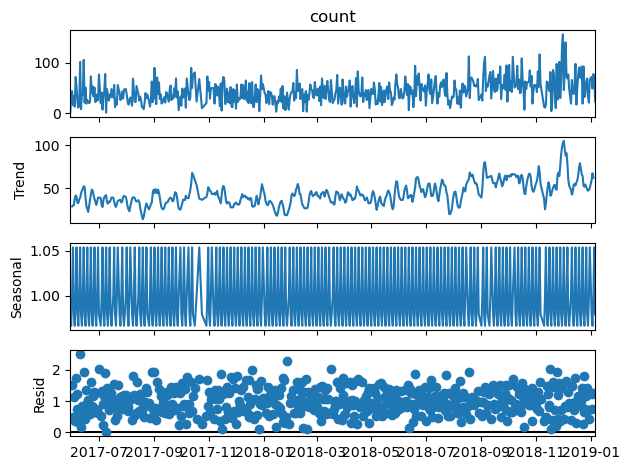

In [246]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['count'], model='mul', period=4)
result.plot();